# Spaceship Titanic Project
Nombre: Valentina Vergara
Rol: 202010523-5
Rut: 20808264-7


## 1. Definición del problema
### Contexto del problema:
Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

### Data disponible y objetivo:
Se cuenta con un archivo cvs que contiene el estado de cada pasajero.
Luego, se cuenta con un archivo cvs de testeo y de prueba, con la información de cada pasajero. La idea del programa es utilizar análisis de datos para predecir si un pasajero fue transportado o no.
En las siguientes líneas de código, se importan las librerías necesarias para hacer este análisis, además de leer los archivos disponibles para trabajar.

In [184]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

In [271]:
# Leyendo los archivos
train = pd.read_csv('/content/drive/MyDrive/spaceship-titanic.zip (Unzipped Files)/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/spaceship-titanic.zip (Unzipped Files)/test.csv')
transport = pd.read_csv('/content/drive/MyDrive/spaceship-titanic.zip (Unzipped Files)/sample_submission.csv')

In [314]:
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

In [187]:
# Modelos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 2. Estadística descriptiva
Se obtienen datos estadísticos a partir del set de data de entrenamiento.

In [188]:
# Shape and preview
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Se puede apreciar que el set contiene el id de cada pasajero, junto con su continente de orígen, si escogieron sueño criogénico, la cabina en la que se quedan, el destino de su viaje, su edad, si escogieron el plan vip, sus gastos en servicio a la habitación, patio de comida, centro comercial, spa, y la cubierta de realidad virtual. Finalmente, también está disponible el nombre de cada pasagero, y la columna 'target', que es si fue transportado o no. Notamos que hay 8693 datos de entrenamiento.

In [189]:
# tipos de datos
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [190]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [191]:
train.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## 3. Visualización descriptiva

### Variables cuantitativas
Visualmente, se explora la distribución de edades en la nave, y los gastos de los pasajeros.

Text(0.5, 0, 'Edad')

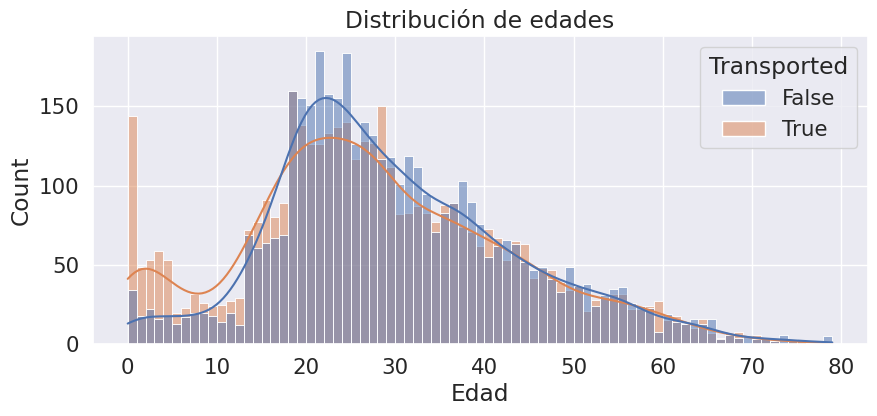

In [192]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Distribución de edades')
plt.xlabel('Edad')

Notemos que desde los 0 a los 18 años, había una mayor probabilidad de ser transportado, mientras que los de 25 a 40 años era menos probable que sean transportados. Luego, desde los 40 años, la probabilidad de ser o no transportado es la misma.

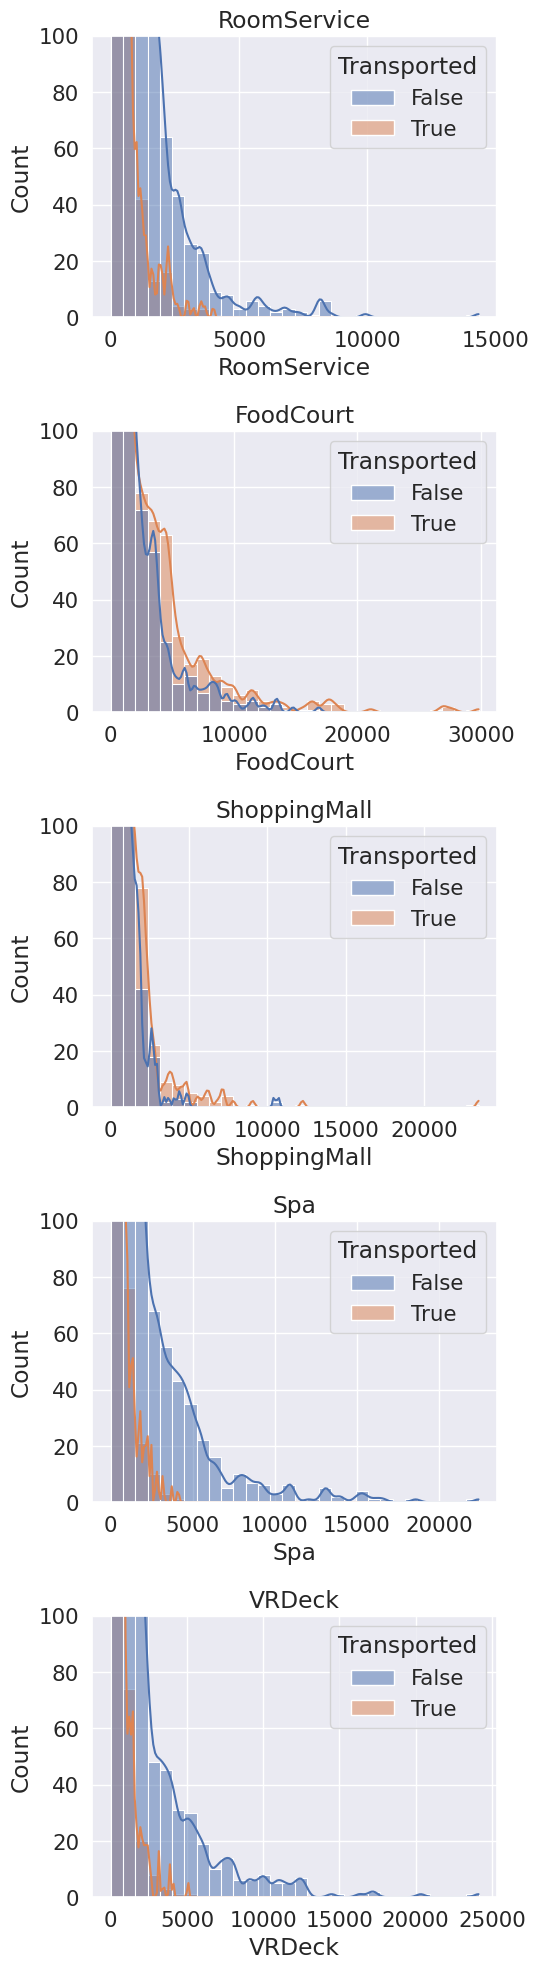

In [193]:
# Gastos
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Visualmente, podemos hacer las siguientes hipótesis:
- La mayoría de los transportados gastaron poco en general.
- Casi todos los que gastaron mucho en el patio de comida, fueron abducidos.
- Los que gastaron en servicio a la habitación, tienen menos probabilidades de transporte.
- Los que gastaron en el patio de comidas, tienen más probabilidad de transporte, sobre todo si gastaron más de \$300.
- Los que gastaron en el centro comercial, tienen más probabilidad de transporte, sobre todo si gastaron más de \$2000.
- Los que gastaron en el spa, tienen menos probabilidades de transporte.
- Los que gastaron en la cubierta de realidad virtual, tienen menos probabilidades de transporte.

### Variables cualitativas
Se analiza el lugar de orígen, el sueño criogénico, el lugar de destino, y el pase vip de los pasajeros abducidos.

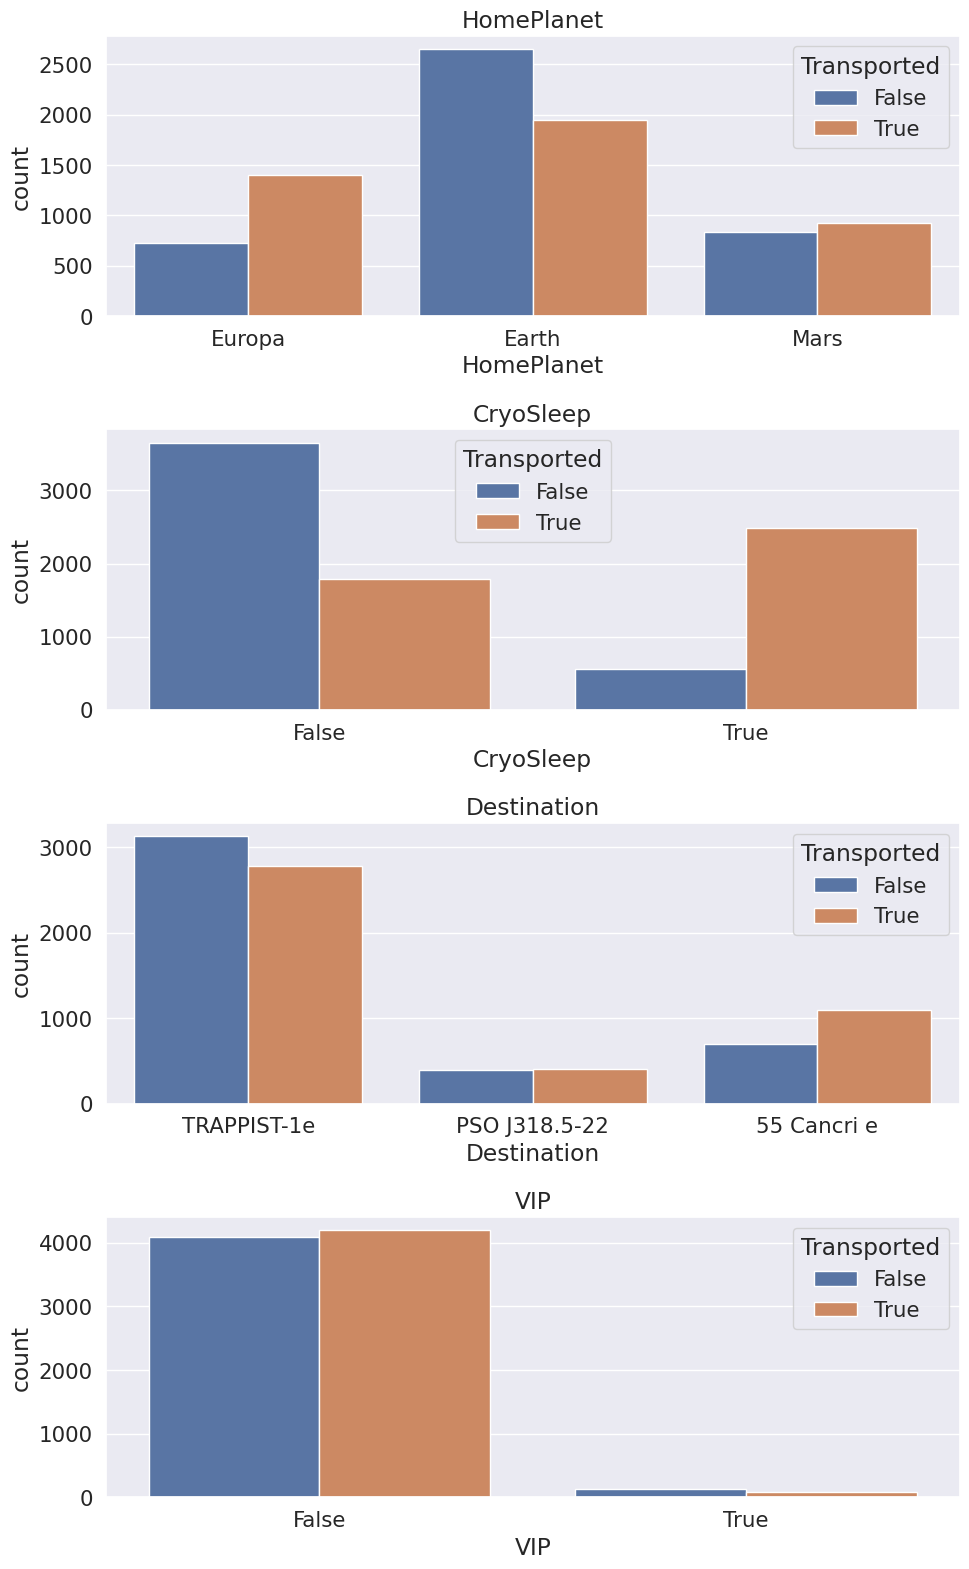

In [194]:
# columnas
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Podemos hacer las siguientes hipótesis a partir de las visualizaciones:
- La mayoría de la gente de Europa fue abducida.
- Hubo más gente de la tierra no abducida que abducida.
- La gente de Marte tuvo igual cantidad de gente abducida y no abducida.
- El factor del sueño criogénico es uno de los más relevantes, o al menos, tiene la mayor correlación con las abducciones.
- El destino no influyó de manera significante, aunque para la gente que iba a 55-Cancrie, la probabilidad de ser abducido era mayor.
- El factor VIP no influyó en las abducciones, ya que para ambos planes, las cantidad de personas abducidas y no abducidas era igual.



## 4. Preprocesamiento

### Data de entrenamiento
Adaptamos el set de datos para la comodidad al aplicar los modelos deseados.

In [274]:
train = train.drop('Name',axis=1)


KeyError: ignored

In [275]:
train = train.drop('Cabin',axis=1)

In [276]:
mapping = {'Europa': 1, 'Earth': 2, 'Mars': 3}
train['HomePlanet'] = train['HomePlanet'].replace(mapping)
train['CryoSleep'] = train['CryoSleep'].fillna(0).astype(int)
mapping2 = {'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3}
train['Destination'] = train['Destination'].replace(mapping2)
train['VIP'] = train['VIP'].fillna(0).astype(int)
train['Transported'] = train['Transported'].fillna(0).astype(int)

train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1.0,0,1.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,2.0,0,1.0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1.0,0,1.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1.0,0,1.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,2.0,0,1.0,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0,2.0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,2.0,1,3.0,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,2.0,0,1.0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,1.0,0,2.0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


### Data de testeo
Modificamos y escalamos el data de testeo

In [278]:
test = test.drop('Name',axis=1)

In [280]:
test = test.drop('Cabin',axis=1)

In [284]:
mapping = {'Europa': 1, 'Earth': 2, 'Mars': 3}
test['HomePlanet'] = test['HomePlanet'].replace(mapping)
test['CryoSleep'] = test['CryoSleep'].fillna(0).astype(int)
mapping2 = {'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3}
test['Destination'] = test['Destination'].replace(mapping2)
test['VIP'] = test['VIP'].fillna(0).astype(int)
test = pd.merge(test, transport, on='PassengerId', how='outer')


In [287]:
test['Transported'] = test['Transported'].fillna(0).astype(int)
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,2.0,1,1.0,27.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0018_01,2.0,0,1.0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0
2,0019_01,1.0,1,2.0,31.0,0,0.0,0.0,0.0,0.0,0.0,0
3,0021_01,1.0,0,1.0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0
4,0023_01,2.0,0,1.0,20.0,0,10.0,0.0,635.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,2.0,1,1.0,34.0,0,0.0,0.0,0.0,0.0,0.0,0
4273,9269_01,2.0,0,1.0,42.0,0,0.0,847.0,17.0,10.0,144.0,0
4274,9271_01,3.0,1,2.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0
4275,9273_01,1.0,0,NaN,NaN,0,0.0,2680.0,0.0,0.0,523.0,0


## 5. Selección de modelo

In [297]:
#models
dt_model = DecisionTreeClassifier()
log_model = LogisticRegression()
svc_model = SVC()
rf_model = RandomForestClassifier()

In [298]:
X_train = train.drop('Transported',axis=1)
y_train = train['Transported']
x_test = test.drop('Transported',axis=1)
y_test = test['Transported']

In [299]:
#modelo 1: Random Forest
rf_model.fit(X_train.fillna(0),y_train.fillna(0)) #ajuste del modelo a los datos de entrenamiento
rf_pred = rf_model.predict(x_test.fillna(0)) #almacenar la predicción en variable linear_pred
print("accuracy score: ", accuracy_score(y_test,rf_pred))

accuracy score:  0.5202244563946692


In [302]:
#modelo 2: Desicion Tree
dt_model.fit(X_train.fillna(0),y_train.fillna(0)) #ajuste del modelo a los datos de entrenamiento
dt_pred = dt_model.predict(x_test.fillna(0)) #almacenar la predicción en variable linear_pred
print("accuracy score: ", accuracy_score(y_test,dt_pred))

accuracy score:  0.4888940846387655


In [303]:
#modelo 3: SVC
svc_model.fit(X_train.fillna(0),y_train.fillna(0)) #ajuste del modelo a los datos de entrenamiento
svc_pred = svc_model.predict(x_test.fillna(0)) #almacenar la predicción en variable linear_pred
print("accuracy score: ", accuracy_score(y_test,svc_pred))

accuracy score:  0.5637128828618191


In [304]:
#modelo 4: Logistic Regression
log_model.fit(X_train.fillna(0),y_train.fillna(0)) #ajuste del modelo a los datos de entrenamiento
log_pred = log_model.predict(x_test.fillna(0)) #almacenar la predicción en variable linear_pred
print("accuracy score: ", accuracy_score(y_test,log_pred))

accuracy score:  0.38555061959317277


Notamos que el mejor ajuste para los datos viene el modelo SVC.

## 6. Métricas y análisis de resultados



In [306]:
y_pred = svc_pred

In [312]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2411 1866]
 [   0    0]]


Verdaderos Positivos (True Positives, TP): 2411

Falsos Positivos (False Positives, FP): 1866

Verdaderos Negativos (True Negatives, TN): 0

Falsos Negativos (False Negatives, FN): 0

En general el modelo predijo a los abducidos, pero falló en predecir abducciones que no sucedieron.

## 7. Visualizaciones del modelo


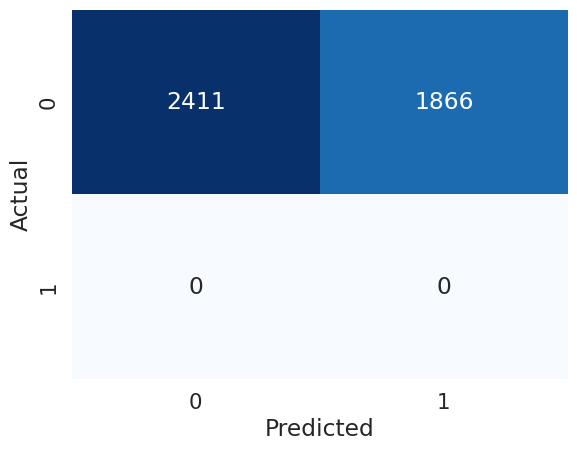

In [313]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

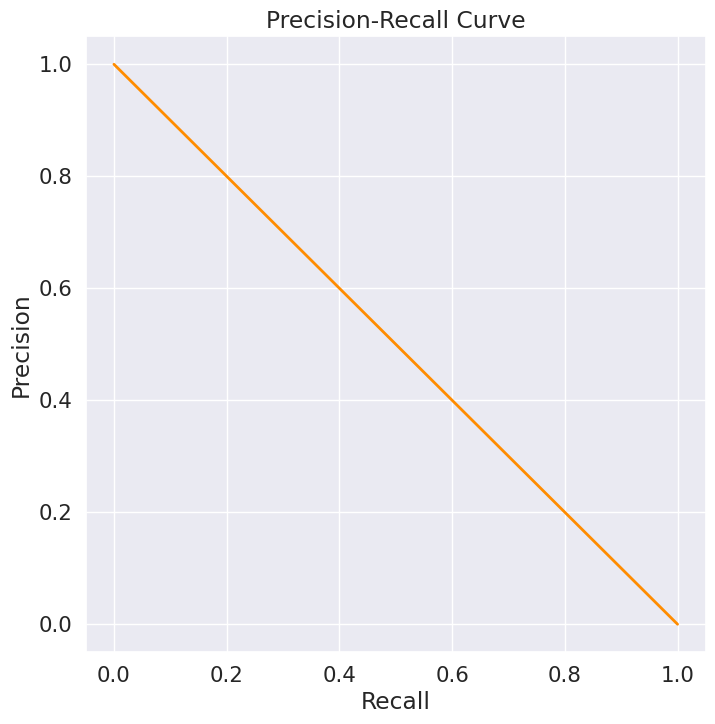

In [316]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()